<a href="https://colab.research.google.com/github/Jcasttrop/Data-Analysis-for-Brazilian-E-commerce/blob/main/Segementaci%C3%B3n_de_mercado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentación de mercado

Este trabajo surge como una conclusión general de un analisis exploratorio de datos, donde quedará conslidada a traves de las variables más importantes de las tablas otorgadas la segementación del mercado

## Carga de datos

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Descargamos nuestros datos
# https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?resource=download


from zipfile import ZipFile

_data = "/content/archive.zip"

with ZipFile(_data, 'r') as zip:
    zip.printdir()
    zip.extractall() 

File Name                                             Modified             Size
olist_customers_dataset.csv                    2021-10-01 19:08:42      9033957
olist_geolocation_dataset.csv                  2021-10-01 19:08:44     61273883
olist_order_items_dataset.csv                  2021-10-01 19:08:48     15438671
olist_order_payments_dataset.csv               2021-10-01 19:08:50      5777138
olist_order_reviews_dataset.csv                2021-10-01 19:08:52     14451670
olist_orders_dataset.csv                       2021-10-01 19:08:52     17654914
olist_products_dataset.csv                     2021-10-01 19:08:54      2379446
olist_sellers_dataset.csv                      2021-10-01 19:08:56       174703
product_category_name_translation.csv          2021-10-01 19:08:56         2613


In [9]:
#Definimos nuestras variables

customers = pd.read_csv("/content/olist_customers_dataset.csv")
sellers = pd.read_csv("/content/olist_sellers_dataset.csv")
orders_reviews = pd.read_csv("/content/olist_order_reviews_dataset.csv")
order_items = pd.read_csv("/content/olist_order_items_dataset.csv")
products = pd.read_csv("/content/olist_products_dataset.csv")
geolocation = pd.read_csv("/content/olist_geolocation_dataset.csv")
category_name_translation = pd.read_csv("/content/product_category_name_translation.csv")
orders = pd.read_csv("/content/olist_orders_dataset.csv")
orders_payments = pd.read_csv("/content/olist_order_payments_dataset.csv")

Haremos un merge de los datos que tienen relación entre sí

In [11]:
#Clientes con las ordenes

clients_total = pd.merge(customers, orders, on='customer_id')
orders_total = pd.merge(orders_payments, orders_reviews, on='order_id')
df_clients = pd.merge(clients_total, orders_total, on='order_id')

#Vendedores con los productos

sellers_total = pd.merge(sellers, order_items, on='seller_id')
products_total = pd.merge(products, category_name_translation, on='product_category_name')
df_products = pd.merge(sellers_total, products_total, on='product_id')

A los dos data sets que tenemos les haremos un merge para facilitar nuetsro EDA 

(eso debido a que tiene datos de relevancia en una sola tabla, facilitandonos el analisis)

In [12]:
df = pd.merge(df_clients, df_products, on='order_id')
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort


## "Data Engineerning"

En nuestro analisis exploratorio de datos es ESENCIAL conocer los datos que tenemos (y no tenemos) a nivel inicial.

In [17]:
print('Número de columnas:',len(df.columns)) 
print('Número de filas:',len(df)) 
print('Número total de datos:',len(df)*len(df.columns))
print('Número total de datos faltantes:',df.isna().sum().sum()) 
print('Porcentaje de datos faltantes: {:.2%}'.format((df.isna().sum().sum())/(len(df)*len(df.columns))))

Número de columnas: 40
Número de filas: 115609
Número total de datos: 4624360
Número total de datos faltantes: 172124
Porcentaje de datos faltantes: 3.72%


Debido a que nuestro porcentaje de datos faltantes es bajo, tomaremos la desición de remplazarlos por datos tipo NaN, asi podremos completar operaciones con el dataset

In [19]:
dt=df.select_dtypes(include='object').fillna('None')
df_clean = df.fillna(dt)
print('Porcentaje de datos faltantes: {:.2%}'.format((df_clean.isna().sum().sum())/(len(df_clean)*len(df_clean.columns)))) 

Porcentaje de datos faltantes: 0.00%


## Analisis Exploratorio de Datos 




### Retargeting

Para muchas empresas, es importante tener una base de datos con los clientes retargeting (es decir, los que han hecho historicamente más de una compra)

https://www.adjust.com/glossary/retargeting/

In [20]:
dict = {'index': 'customer_unique_id','customer_unique_id': 'Count'}
retargeting_unique = pd.DataFrame(df_clean['customer_unique_id'].value_counts()).reset_index().rename(columns=dict)
retargeting_unique

,customer_unique_id,Count
0,9a736b248f67d166d2fbb006bcb877c3,75
1,6fbc7cdadbb522125f4b27ae9dee4060,38
2,f9ae226291893fda10af7965268fb7f6,35
3,8af7ac63b2efbcbd88e5b11505e8098a,29
4,569aa12b73b5f7edeaa6f2a01603e381,26
...,...,...
93391,1525c29997724d87a8cd9a7654738f26,1
93392,6f2c390d13e34756276886c8d0400237,1
93393,31749fa0149e198015467e54929d5123,1
93394,eba09274717d18bcadb6fbf9dd6558ed,1


**Ahora** tenemos una lista con todos los clientes que han hecho al menos una compra; podriamos extender nuestro analisis si tuvieramos más información de los clientes.

### La categoria de productos más compradas en nuetsro olist

In [28]:
category_sold = df_clean.groupby(['product_category_name_english'], as_index=False)['payment_value'].count().rename(columns = {'payment_value':'total_orders'})

#Creamos una columna en la cual podamos ver el porcentaje
category_sold['%'] = round((category_sold['total_orders'] / category_sold['total_orders'].sum()) * 100, 2)

#Traemos a colación los 10 más grandes
category_sold10 = category_sold.nlargest(10, 'total_orders')


#Quitese el comentado de la ultima linea si es de interes ver la lista en vez de la grafica
#category_sold10

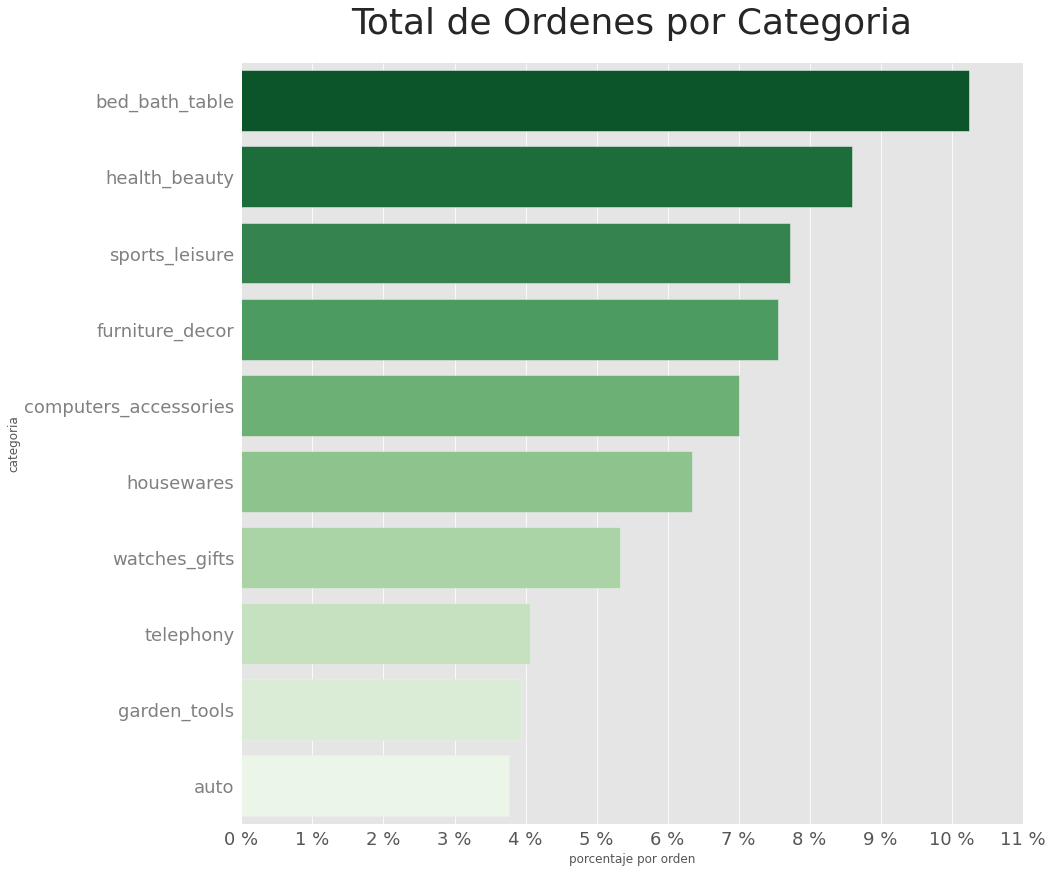

In [25]:
fig = plt.figure(figsize =([14, 14])) 
sns.set_style('darkgrid')
plt.style.use('ggplot')
g = sns.barplot(x=category_sold10['%'], y=category_sold10['product_category_name_english'], palette='Greens_r', data=category_sold10)
plt.title('Total de Ordenes por Categoria', size=36, y=1.03)
plt.yticks(fontsize=18, color='gray');
plt.ylabel('categoria', fontsize=12)
plt.xlabel('porcentaje por orden', fontsize=12)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['0 %', '1 %', '2 %', '3 %', '4 %', '5 %', '6 %', '7 %', '8 %', '9 %', '10 %', '11 %'], fontsize=18);
g.spines['top'].set_visible(False)
g.spines['right'].set_visible(False)
plt.show()

### Cantidad de dinero que genera en ventas estos productos

In [66]:
total_category_value = pd.DataFrame(df_clean.groupby(by=["product_category_name_english"])["payment_value"].sum().reset_index().sort_values(by=['payment_value'],ascending=False))

#Añadimos el precio a dolares, a la fecha de (06-13-2022) en el que 1 REAL = 0.195340 REALES
total_category_value["USD"] = total_category_value["payment_value"] * 1.75506
category_value10 = total_category_value.nlargest(10, 'payment_value')

,product_category_name_english,payment_value,USD
7,bed_bath_table,1725465.67,3.028296e+06
43,health_beauty,1646292.53,2.889342e+06
15,computers_accessories,1592611.66,2.795129e+06
39,furniture_decor,1427214.01,2.504846e+06
70,watches_gifts,1420682.17,2.493382e+06
65,sports_leisure,1390581.87,2.440555e+06
49,housewares,1091709.15,1.916015e+06
42,garden_tools,834757.45,1.465049e+06
5,auto,802254.74,1.408005e+06
20,cool_stuff,772616.70,1.355989e+06


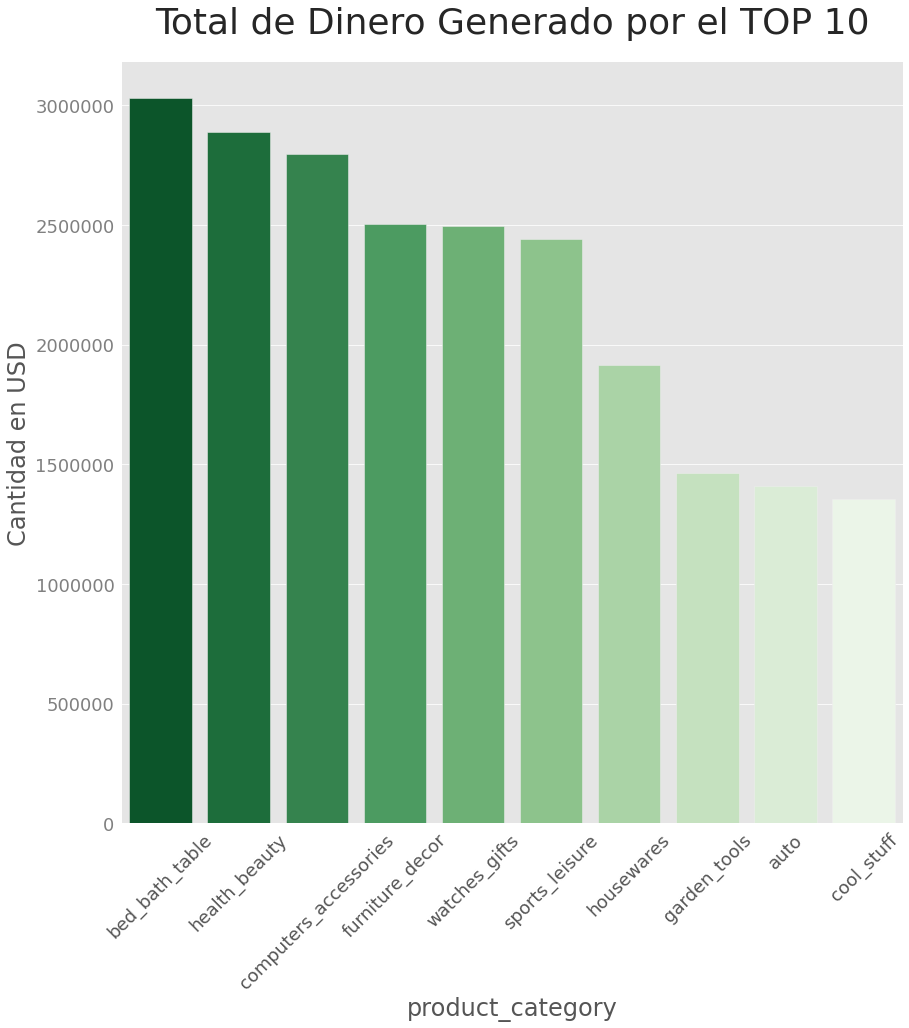

In [68]:
fig = plt.figure(figsize =([14, 14])) 
sns.set_style('darkgrid')
plt.style.use('ggplot')
g = sns.barplot(x=category_value10['product_category_name_english'], y=category_value10['USD'], palette='Greens_r', orient="v")
plt.title('Total de Dinero Generado por el TOP 10', size=36, y=1.03)
plt.yticks(fontsize=18, color='gray');
plt.ylabel('Cantidad en USD', fontsize=24)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('product_category', fontsize=24)
plt.xticks(fontsize=18, rotation=45)
g.spines['top'].set_visible(False)
g.spines['right'].set_visible(False)
plt.show()

### Top 10 productos vendidos

In [26]:
products_sold = df_clean.groupby(['product_id'], as_index=False)['payment_value'].count().rename(columns = {'payment_value':'total_orders'})

#Creamos una columna en la cual podamos ver el porcentaje
products_sold['%'] = round((products_sold['total_orders'] / products_sold['total_orders'].sum()) * 100, 2)

#Traemos a colación los 10 más grandes
products_sold10 = products_sold.nlargest(10, 'total_orders')


#Quitese el comentado de la ultima linea si es de interes ver la lista en vez de la grafica
products_sold10

,product_id,total_orders,%
21607,aca2eb7d00ea1a7b8ebd4e68314663af,533,0.46
19287,99a4788cb24856965c36a24e339b6058,517,0.45
8402,422879e10f46682990de24d770e7f83d,507,0.44
7184,389d119b48cf3043d311335e499d9c6b,405,0.35
6906,368c6c730842d78016ad823897a372db,395,0.34
10577,53759a2ecddad2bb87a079a1f1519f73,389,0.34
26411,d1c427060a0f73f6b889a5c7c61f2ac4,354,0.31
10603,53b36df67ebb7c41585e8d54d6772e08,324,0.28
2729,154e7e31ebfa092203795c972e5804a6,294,0.25
7854,3dd2a17168ec895c781a9191c1e95ad7,276,0.24


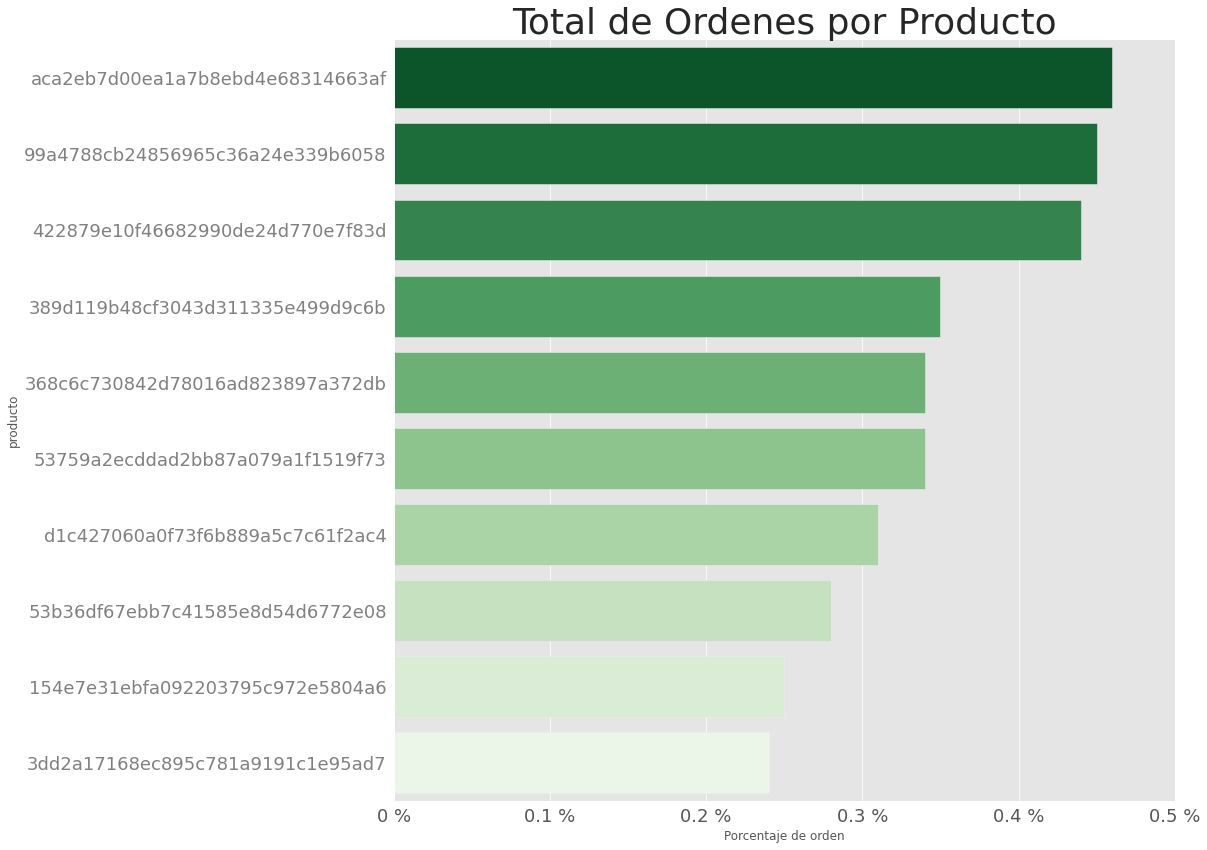

In [30]:
fig = plt.figure(figsize =([14, 14])) 
sns.set_style('darkgrid')
plt.style.use('ggplot')
g = sns.barplot(x=products_sold10['%'], y=products_sold10['product_id'], palette='Greens_r', data=products_sold10)
plt.title('Total de Ordenes por Producto', size=36)
plt.yticks(fontsize=18, color='gray');
plt.ylabel('producto', fontsize=12)
plt.xlabel('Porcentaje de orden', fontsize=12)
plt.xticks([0,0.1,0.2,0.3,0.4,0.5],['0 %', '0.1 %', '0.2 %', '0.3 %', '0.4 %', '0.5 %'], fontsize=18);
g.spines['top'].set_visible(False)
g.spines['right'].set_visible(False)
plt.show()

### Evaluación de los clientes hacia los vendedores

In [36]:
#Creamos un diccionario para renombrar las columnas del dataset de revies

dict = {'index': 'review_score','review_score': 'Count'}

total_reviews = pd.DataFrame(df_clean['review_score'].value_counts().reset_index().rename(columns=dict).sort_values(by=['review_score'],ascending=True))
total_reviews['%'] = round((total_reviews['review_score'] / total_reviews['review_score'].sum()) * 100, 2)

total_reviews

,review_score,Count,%
2,1,14546,6.67
4,2,4020,13.33
3,3,9718,20.00
1,4,21951,26.67
0,5,65374,33.33


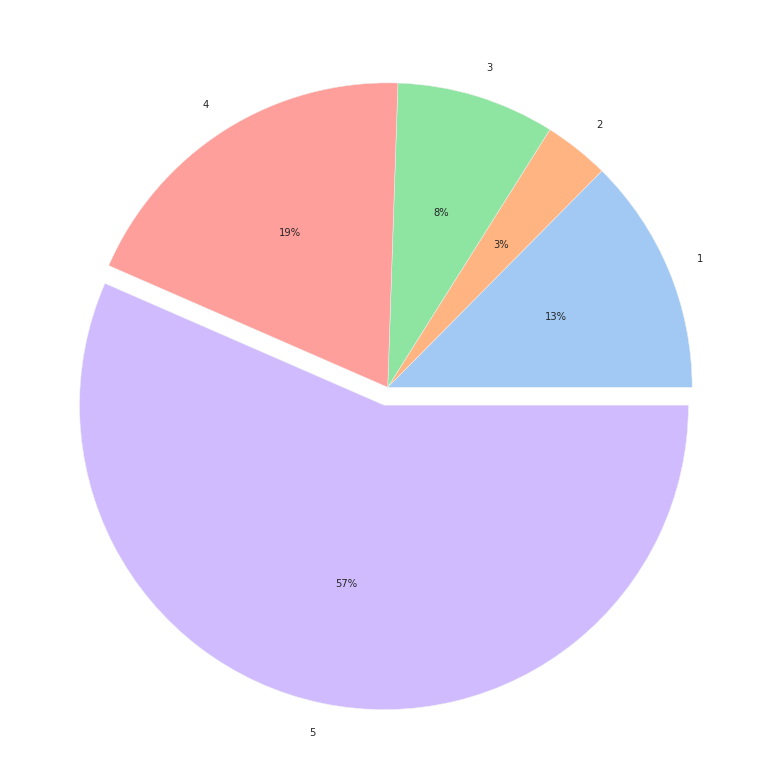

In [50]:
fig = plt.figure(figsize =([14, 14])) 
sns.set_style('darkgrid')
plt.style.use('ggplot')
colors = sns.color_palette('pastel')[0:5]
explode = [0, 0, 0, 0, 0.06]

plt.pie(total_reviews["Count"], labels = total_reviews["review_score"], colors = colors,explode = explode, autopct='%.0f%%')
plt.show()


#Aqui podriamos poner en vez de los números, los iconos de estrellitas

A partir de la grafica, podemos ver que el 57% de nuestros usuarios está satisfecho con su vendedor; siendo solo el 16% de nuestros usuarios los que han tenido malas experiencias

-

**Este analisis se puede expandir** A partir de las reviews de los usuarios que dieron una puntuacion negativa, asi podemos prevenir malas experiencias en los usuarios

### De donde vienen las compras

In [55]:
dict = {'index': 'customer_state','customer_state': 'Count'}
total_customer_state = pd.DataFrame(df_clean['customer_state'].value_counts().reset_index().rename(columns=dict).sort_values(by=['Count'],ascending=False))


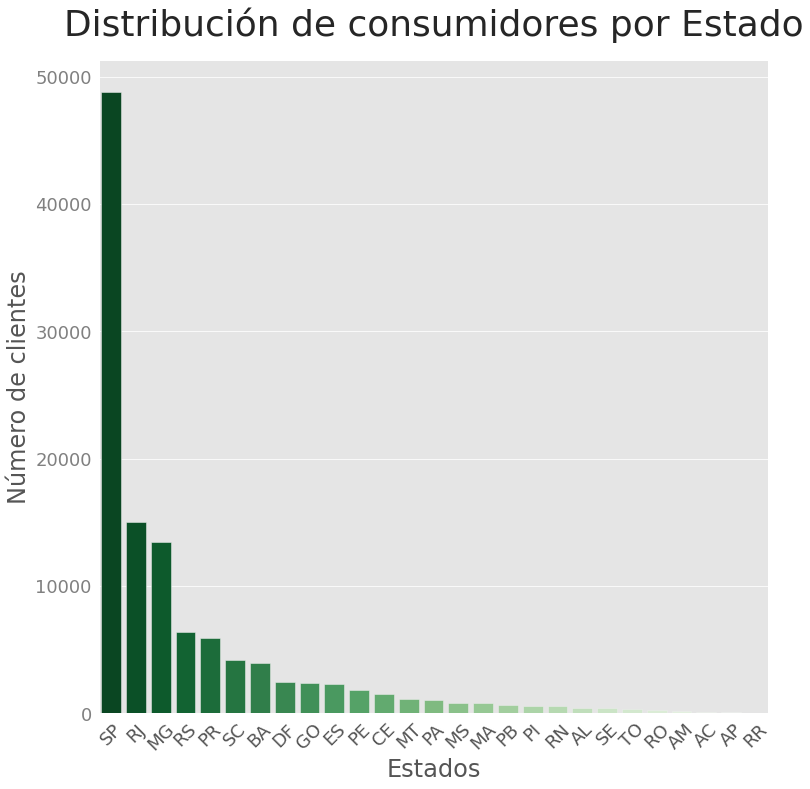

In [57]:
fig = plt.figure(figsize =([12, 12])) 
sns.set_style('darkgrid')
plt.style.use('ggplot')
g = sns.barplot(x=total_customer_state['customer_state'], y=total_customer_state['Count'], palette='Greens_r', orient="v")
plt.title('Distribución de consumidores por Estado', size=36, y=1.03)
plt.yticks(fontsize=18, color='gray');
plt.ylabel('Número de clientes', fontsize=24)
plt.xlabel('Estados', fontsize=24)
plt.xticks(fontsize=18, rotation=45)
g.spines['top'].set_visible(False)
g.spines['right'].set_visible(False)
plt.show()

Para expandir el analisis vamos a añadir la cantidad de dinero generada por las compras de los estados

In [58]:
total_payment_value = pd.DataFrame(df_clean.groupby(by=["customer_state"])["payment_value"].sum().reset_index().sort_values(by=['payment_value'],ascending=False))
total_payment_value

,customer_state,payment_value
25,SP,7502926.95
18,RJ,2708839.33
10,MG,2288949.71
22,RS,1131899.22
17,PR,1055747.81
4,BA,780334.54
23,SC,769744.94
8,GO,459466.06
6,DF,430126.51
7,ES,390840.58


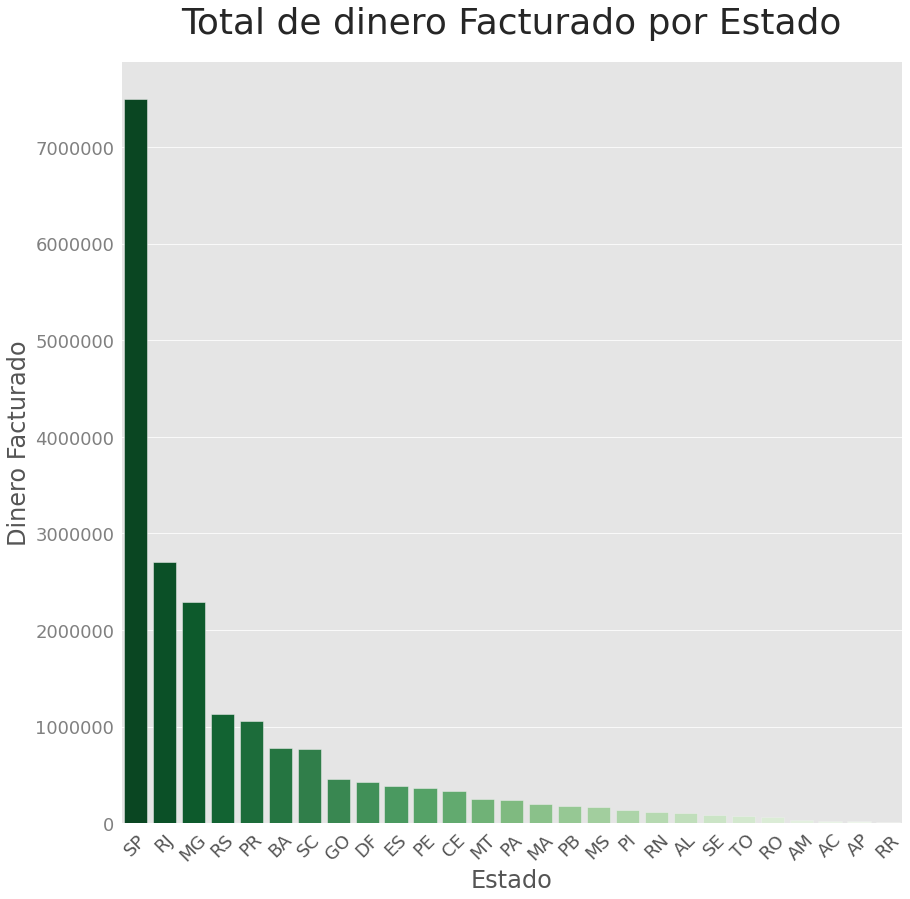

In [61]:
fig = plt.figure(figsize =([14, 14])) 
sns.set_style('darkgrid')
plt.style.use('ggplot')
g = sns.barplot(x=total_payment_value['customer_state'], y=total_payment_value['payment_value'], palette='Greens_r', orient="v")
plt.title('Total de dinero Facturado por Estado', size=36, y=1.03)
plt.yticks(fontsize=18, color='gray');
plt.ylabel('Dinero Facturado', fontsize=24)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Estado', fontsize=24)
plt.xticks(fontsize=18, rotation=45)
g.spines['top'].set_visible(False)
g.spines['right'].set_visible(False)
plt.show()